# Customer Churn (Random Forest)

In [27]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Adnan - PC\OneDrive\Desktop\dataset\Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.drop(columns={'Gender','Surname','CustomerId','RowNumber'},axis=1,inplace=True)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
x = df.drop(columns={'Exited'},axis=1)
y = df['Exited']

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
# feature engineering
x_train['Geography'] = le.fit_transform(x_train['Geography'])
x_test['Geography'] = le.transform(x_test['Geography'])

In [15]:
x_train.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,0,32,6,0.00,2,1,1,179093.26
1561,632,1,42,4,119624.60,2,1,1,195978.86
1670,559,2,24,3,114739.92,1,1,0,85891.02
6087,561,0,27,9,135637.00,1,1,0,153080.40
6669,517,0,56,9,142147.32,1,0,0,39488.04


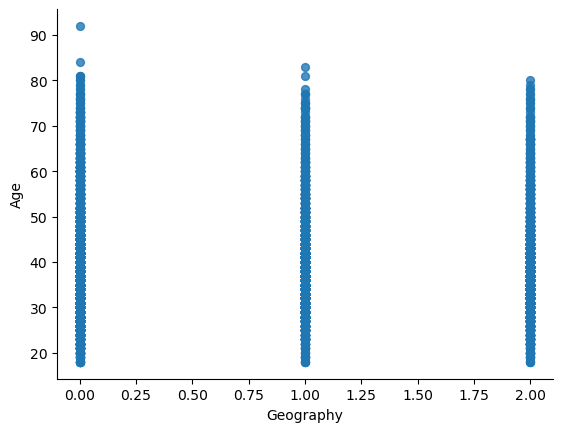

In [17]:
# @title Geography vs Age

from matplotlib import pyplot as plt
x_train.plot(kind='scatter', x='Geography', y='Age', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [18]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)

In [19]:
x_train.skew()

CreditScore       -0.085370
Geography          0.619385
Age                0.582332
Tenure             0.075039
Balance           -0.290207
NumOfProducts      1.123293
HasCrCard         -0.489547
IsActiveMember     0.548895
EstimatedSalary   -0.011338
dtype: float64

In [20]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer(method = 'yeo-johnson')
x_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = pt.fit_transform(x_train[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])
x_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']] = pt.transform(x_test[['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']])

In [21]:
x_train.skew()

CreditScore       -0.016491
Geography          0.619385
Age               -0.000406
Tenure            -0.146848
Balance           -0.757619
NumOfProducts      0.509069
HasCrCard         -0.489547
IsActiveMember     0.548895
EstimatedSalary   -0.287761
dtype: float64

In [22]:
y_train.value_counts()

Exited
0    6356
1    6356
Name: count, dtype: int64

In [23]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [24]:
x_train.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.392999,0,-0.887239,0.488421,-1.463717,1.235234,1,1,1.269187
1,-0.204295,1,0.202897,-0.218427,0.686687,1.235234,1,1,1.501286
2,-0.996654,2,-1.975160,-0.600768,0.666852,-0.782266,1,0,-0.153678
3,-0.975190,0,-1.537758,1.451515,0.747469,-0.782266,1,0,0.899163
4,-1.444040,0,1.423426,1.451515,0.770548,-0.782266,0,0,-1.028085


In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [26]:
y_pred = dt.predict(x_test)
from sklearn.metrics import classification_report
print("\n")
print(classification_report(y_test,y_pred))



              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1607
           1       0.49      0.47      0.48       393

    accuracy                           0.80      2000
   macro avg       0.68      0.68      0.68      2000
weighted avg       0.80      0.80      0.80      2000



In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.817
              precision    recall  f1-score   support

           0       0.91      0.86      0.88      1607
           1       0.53      0.65      0.58       393

    accuracy                           0.82      2000
   macro avg       0.72      0.76      0.73      2000
weighted avg       0.83      0.82      0.82      2000



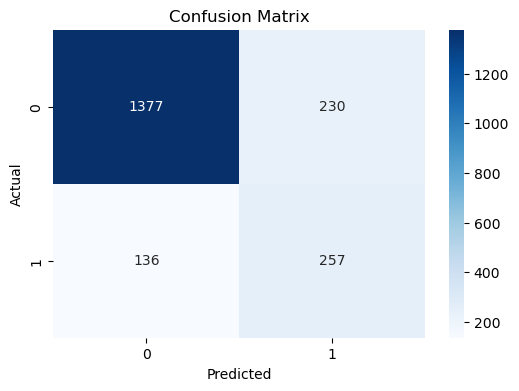

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
